In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats as stats
from scipy.stats import norm as norm

# Problem 1

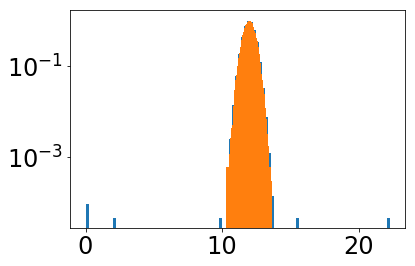

[10.0, 2.1, 0.0, 0.0, 15.6, 22.3]


In [31]:
#A) So our goal is to identify bad data and throw it out.

#Start by exploring the data you have created with appropriate plots
#State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')



mask_dist = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)

errorvals = []
maskresult = []

for i in range(len(d)):
    probability = stats.norm.cdf(d[i], loc = 12., scale = 0.4)
    sigma = stats.norm.ppf(probability)
    if sigma > 5 or sigma < -5:
        errorvals.append(d[i])
    else: 
        maskresult.append(d[i])

ax.hist(maskresult, 100, density=True)
plt.show()
print(errorvals)

### Restate your question in math. Be very clear.

### Apply your statistical test and construct a truth table.

|True Correct Value|True Incorrect Value
-|-|-
Identified Correct Value  |100000|1
Identified Incorrect Value|0|6

### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?
The number of omissions goes up as the selected sigma decreases. This is predictable because as sigma is lower and our bounds are tightened we can expect that a greater number of good data is thrown out mistakenly.

### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There are some mistakes of commission, in this instance there was one. They are avoidable, but not at the cost of excluding good data. Bad data gets in when we use a higher sigma as our benchmark.

# Problem 2

In [ ]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
mask_arr = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))

mask_arr = [][]
for i in range(len(a[0,:])):
    probability = stats.rayleigh.cdf(d[i], loc = 12., scale = 0.4)
    sigma = stats.rayleigh.ppf(probability)
    for x in range(len(a[1,:])):
        probability = stats.rayleigh.cdf(a[1, x], loc = 12., scale = 0.4)
        sigma = stats.rayleigh.ppf(probability)
        if sigma > 5 or sigma < -5:
            mask_arr.append(d[i])
        else: 
            maskresult.append(d[i])
    if sigma > 5 or sigma < -5:
        mask_arr.append(d[i])
    else: 
        maskresult.append(d[i])

mask = ax.hist2d(mask_arr[0,:], mask_arr[1,:],bins=100, density=True)
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

1. What is the question in words?

   The question in words is "What amount of arcsecond motion is indicative of an asteroid's presence?" 
   
1. What is the question in math?